In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
df = pd.read_csv('D:\BITS PILANI\Data Mining\Lab\Python\Lab 3 - Decision Tree\spambase_data.csv', header=None)

In [14]:
X = df[df.columns[:-1]]
Y = df[len(df.columns)-1]

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=32)

In [16]:
dtree = DecisionTreeClassifier()

In [17]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [18]:
prediction = dtree.predict(X_test)

In [19]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       548
           1       0.88      0.87      0.88       373

    accuracy                           0.90       921
   macro avg       0.90      0.90      0.90       921
weighted avg       0.90      0.90      0.90       921



In [21]:
print(confusion_matrix(Y_test, prediction))

[[504  44]
 [ 47 326]]


In [22]:
print(accuracy_score(Y_test, prediction))

0.9011943539630836


In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 16), dpi = 1024)
plot_tree(dtree)

[Text(10825.45135135135, 12182.49696969697, 'X[52] <= 0.056\ngini = 0.476\nsamples = 3680\nvalue = [2240, 1440]'),
 Text(9410.873873873874, 11807.65090909091, 'X[6] <= 0.065\ngini = 0.354\nsamples = 2774\nvalue = [2136, 638]'),
 Text(8030.694294294294, 11432.804848484848, 'X[51] <= 0.477\ngini = 0.27\nsamples = 2519\nvalue = [2114, 405]'),
 Text(6662.114114114114, 11057.958787878788, 'X[15] <= 0.025\ngini = 0.188\nsamples = 2262\nvalue = [2024, 238]'),
 Text(5450.190990990991, 10683.112727272728, 'X[23] <= 0.02\ngini = 0.128\nsamples = 2000\nvalue = [1862, 138]'),
 Text(4532.516516516516, 10308.266666666666, 'X[4] <= 0.715\ngini = 0.107\nsamples = 1952\nvalue = [1841, 111]'),
 Text(3707.637237237237, 9933.420606060607, 'X[54] <= 19.714\ngini = 0.081\nsamples = 1786\nvalue = [1710, 76]'),
 Text(3555.113513513513, 9558.574545454545, 'X[27] <= 7.105\ngini = 0.077\nsamples = 1780\nvalue = [1709, 71]'),
 Text(3478.8516516516515, 9183.728484848485, 'X[24] <= 0.015\ngini = 0.075\nsamples = 17

<h1>Q1</h1>

In [37]:
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X_train, Y_train)
predict = tree.predict(X_test)
print(classification_report(Y_test, predict))
print(accuracy_score(Y_test, predict))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       548
           1       0.87      0.52      0.65       373

    accuracy                           0.78       921
   macro avg       0.81      0.73      0.74       921
weighted avg       0.80      0.78      0.76       921

0.7752442996742671


[Text(167.4, 163.07999999999998, 'X[52] <= 0.056\ngini = 0.476\nsamples = 3680\nvalue = [2240, 1440]'),
 Text(83.7, 54.360000000000014, 'gini = 0.354\nsamples = 2774\nvalue = [2136, 638]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.203\nsamples = 906\nvalue = [104, 802]')]

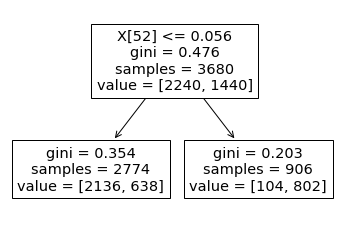

In [38]:
plot_tree(tree)

In [39]:
print('error = ', 1-accuracy_score(Y_test, predict))

error =  0.2247557003257329


<h1>Q2</h1>

In [43]:
entree = DecisionTreeClassifier(criterion='entropy', random_state=30)

entree.fit(X_train, Y_train)
print(accuracy_score(Y_test, entree.predict(X_test)))

0.9283387622149837


<h1>Q3</h1>

In [44]:
ginitree = DecisionTreeClassifier(criterion='gini', random_state=30)

ginitree.fit(X_train, Y_train)
print(accuracy_score(Y_test, ginitree.predict(X_test)))

0.9055374592833876


In [45]:
print('Decision tree using ENTROPY gives better accuracy')

Decision tree using ENTROPY gives better accuracy


<h1>Q4</h1>

In [55]:
depth = entree.get_depth()
accuracy = []

for length in range(1,depth):
    q4tree = DecisionTreeClassifier(criterion='entropy', random_state=30, max_depth=length)
    q4tree.fit(X_train, Y_train)
    score = accuracy_score(Y_test, q4tree.predict(X_test))
    accuracy.append(score)

print('Highest accuracy =', max(accuracy), 'for Decision Tree length =', accuracy.index(max(accuracy)))

Highest accuracy = 0.9348534201954397 for Decision Tree length = 12


<h1>Q5</h1>

In [70]:
import heapq

feature_imp = entree.feature_importances_
pd.DataFrame(feature_imp)
np.argsort(feature_imp)

array([28, 30, 31, 33, 34, 37, 38, 39, 14, 25, 40, 29, 42, 46, 47, 50,  3,
       10, 12, 41,  1, 32, 19, 13, 36, 53,  9,  0, 21, 43, 23,  2, 35,  8,
        5, 22, 16, 27, 48, 49, 11,  7, 17, 44, 20, 56, 18,  4, 45, 26, 15,
       54, 55, 24, 51,  6, 52], dtype=int64)

In [87]:
features = df[list(np.argsort(feature_imp)[-10:,])]
features

,4,45,26,15,54,55,24,51,6,52
0,0.32,0.00,0.0,0.32,3.756,61,0.0,0.778,0.00,0.000
1,0.14,0.00,0.0,0.14,5.114,101,0.0,0.372,0.21,0.180
2,1.23,0.06,0.0,0.06,9.821,485,0.0,0.276,0.19,0.184
3,0.63,0.00,0.0,0.31,3.537,40,0.0,0.137,0.31,0.000
4,0.63,0.00,0.0,0.31,3.537,40,0.0,0.135,0.31,0.000
...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.31,0.0,0.00,1.142,3,0.0,0.000,0.00,0.000
4597,0.00,2.00,0.0,0.00,1.555,4,0.0,0.353,0.00,0.000
4598,0.00,1.20,0.0,0.00,1.404,6,0.0,0.000,0.00,0.000
4599,0.32,0.32,0.0,0.00,1.147,5,0.0,0.000,0.00,0.000


In [98]:
X1 = features
Y1 = df[len(df.columns)-1]

In [99]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=30)

In [100]:
q5tree = DecisionTreeClassifier(criterion='entropy')
q5tree.fit(X1_train, Y1_train)

print('accuracy = ', accuracy_score(Y1_test, q5tree.predict(X1_test)))

accuracy =  1.0


In [102]:
print('As accuracy = 1,it implies that there is NO INFORMATION LOSS')

As accuracy = 1,it implies that there is NO INFORMATION LOSS
